In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Use local eurostat package instead of original package
import sys
sys.path.insert(0, 'C:\\Users\\digval\\Documents\\eurostat\\eurostat')
import eurostat

import numpy as np

import xgboost as xgb
from sklearn.metrics  import mean_squared_error

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Show all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" # change to all, to show all

In [109]:
data = pd.read_pickle("prodtrade_comp.pickle")

In [110]:
data.head()


,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,flags
0,EU,WORLD,2207,1,QUANTITY_IN_100KG,1988-01-01,249569.0,
1,EU,WORLD,2207,1,VALUE_IN_EUROS,1988-01-01,13003452.0,
2,EU,WORLD,291811,1,QUANTITY_IN_100KG,1988-01-01,15036.0,
3,EU,WORLD,291811,1,VALUE_IN_EUROS,1988-01-01,2012587.0,
4,EU,WORLD,291719,1,QUANTITY_IN_100KG,1988-01-01,31097.0,


In [111]:
data.columns

Index(['reporter', 'partner', 'product', 'flow', 'indicators', 'TIME_PERIOD',
       'OBS_VALUE', 'flags'],
      dtype='object')

In [112]:
data.TIME_PERIOD.max()

Timestamp('2023-12-01 00:00:00')

In [113]:
df = data[(data.reporter != "EU") & (data.flow == "1")].groupby(['product', 'indicators', 'TIME_PERIOD'], as_index='False').OBS_VALUE.sum().reset_index()
df.head()

,product,indicators,TIME_PERIOD,OBS_VALUE
0,2207,QUANTITY_IN_100KG,1988-01-01,249569.0
1,2207,QUANTITY_IN_100KG,1988-02-01,259503.0
2,2207,QUANTITY_IN_100KG,1988-03-01,293553.0
3,2207,QUANTITY_IN_100KG,1988-04-01,238507.0
4,2207,QUANTITY_IN_100KG,1988-05-01,239786.0


In [114]:
df.TIME_PERIOD.max()

Timestamp('2023-12-01 00:00:00')

In [131]:
plot_df = df[(df.indicators == "QUANTITY_IN_100KG") & (df.TIME_PERIOD >= "2000") & (df.TIME_PERIOD < "2023-05")]
plot_df.loc[:,"OBS_VALUE"] = plot_df.OBS_VALUE / 10
plot_df = plot_df[["product", "TIME_PERIOD", "OBS_VALUE"]]
plot_df.OBS_VALUE = plot_df.OBS_VALUE / 10**6
plot_df.tail()

,product,TIME_PERIOD,OBS_VALUE
2147,291811,2022-12-01,0.027610
2148,291811,2023-01-01,0.032493
2149,291811,2023-02-01,0.033299
2150,291811,2023-03-01,0.041586
2151,291811,2023-04-01,0.044397


In [132]:
plot_df.TIME_PERIOD.max()

Timestamp('2023-04-01 00:00:00')

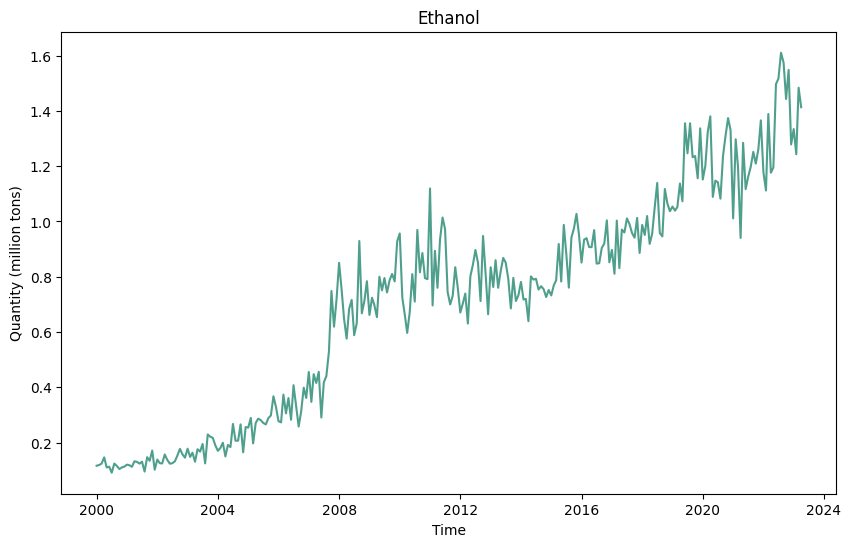

In [139]:
#sns.set_palette("YlGnBu")
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df[plot_df["product"] == "2207"], x='TIME_PERIOD', y='OBS_VALUE', color="#4f9f8d")
plt.title("Ethanol")
plt.xlabel('Time')
plt.ylabel('Quantity (million tons)')
#plt.legend(title='Product')
plt.show()

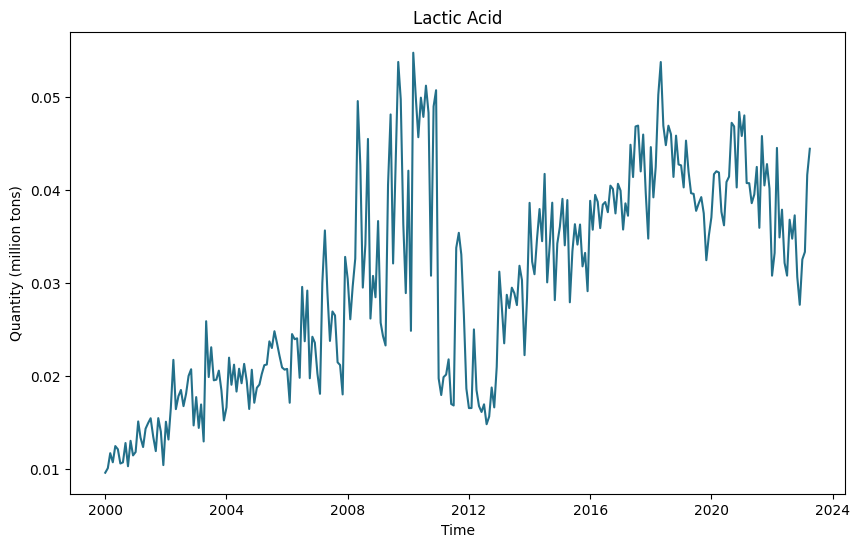

In [140]:
#sns.set_palette("YlGnBu")
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df[plot_df["product"] == "291811"], x='TIME_PERIOD', y='OBS_VALUE', color="#23708a")
plt.title("Lactic Acid")
plt.xlabel('Time')
plt.ylabel('Quantity (million tons)')
#plt.legend(title='Product')
plt.show()

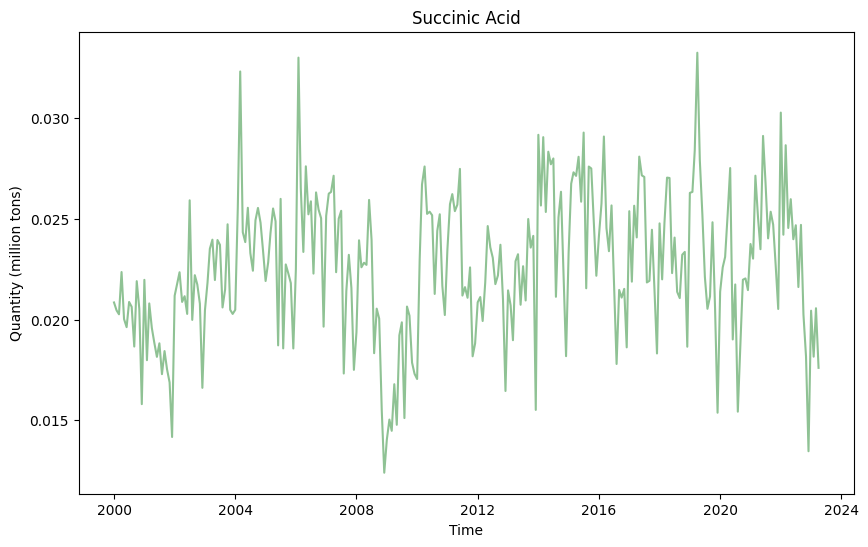

In [141]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df[plot_df["product"] == "291719"], x='TIME_PERIOD', y='OBS_VALUE', color="#8fc294")
plt.title("Succinic Acid")
plt.xlabel('Time')
plt.ylabel('Quantity (million tons)')
#plt.legend(title='Product')
plt.show()